# Image Classification - Fastai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64    # 64 images it processes at one time 
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

in fastai, 'DataBunch' is the general function to establish dataset

In [4]:
help(untar_data)    #Union below means 'either'

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path = untar_data(URLs.PETS);
path     #path where is our data is after fully downloaded 

PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls() #to check what is inside the folder/path

[PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/.DS_Store'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/annotations')]

In [8]:
### path to each folder in the dataset
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
## lets check the images
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/nazribajuri/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [10]:
## How do we get the labels?

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [19]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs)

data.normalize(imagenet_stats)

#ImageDataBunch is a function to import and process data. Also it will divide your datasets into 3 - 1. Train, 2. Validation 3. Test
#normalize(imagenet_stats) is to ensure image is of the same 'size' = mean =0, std deviation=1 etc
# Here is where DATA AUGMENTATION occurs (mainly for Computer Vision project)


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,shiba_inu
Path: /Users/nazribajuri/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,British_Shorthair,British_Shorthair,Sphynx,Bengal
Path: /Users/nazribajuri/.fastai/data/oxford-iiit-pet/images;

Test: None

In [20]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



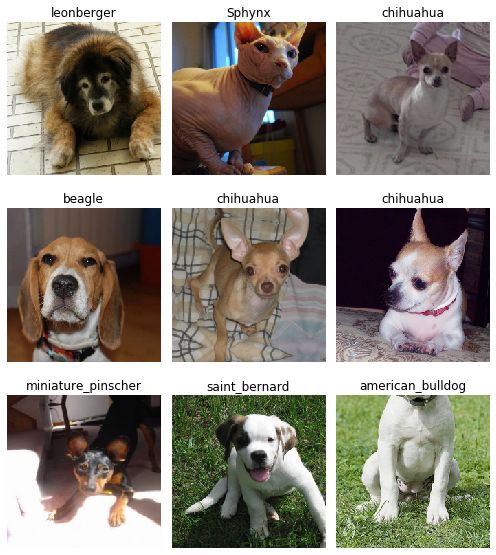

In [21]:
#Now let's look at the images

data.show_batch(rows=3, figsize=(7,8))   #if you noticed, all images have been centrally cropped

In [25]:
# What about the labels?

print(data.classes)   #labels = classes
len(data.classes), data.c   #it shows 37 categories! :)     # take 'data.c' as a number of classes for now

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: ResNet34

In Fastai, training a model is called 'learner'

In [35]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)  

#use RestNet as the model. It has been perfectly optimised. When you used it 1st time, it will download the pre-trained model.
#meaning it has some weights that have been optimised. Fasten the whole process of training. Fast.ai team has trained this for 1.5M images
#on imagenet. This is part of what we called 'TRANSFER LEARNING'
#metrics is for evaluation. Will be printed out during training for every epoch
#The error rate, based on VALIDATION set (to avoid overfitting), where the model never got to see


In [31]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### Initial Train - just the final layer (that's why it is really fast)

In [36]:
learn.fit_one_cycle(2)   #this is better than 'fit' based on previous research paper

epoch,train_loss,valid_loss,error_rate,time
0,1.105146,0.276014,0.090663,30:12
1,0.509980,0.228776,0.079161,34:02


In [37]:
learn.save('stage-1')    #we save the weight of the trained model

## Results

In [38]:
interp = ClassificationInterpretation.from_learner(learn)    
#Now we gonna interpret our learner (which has data and trained model

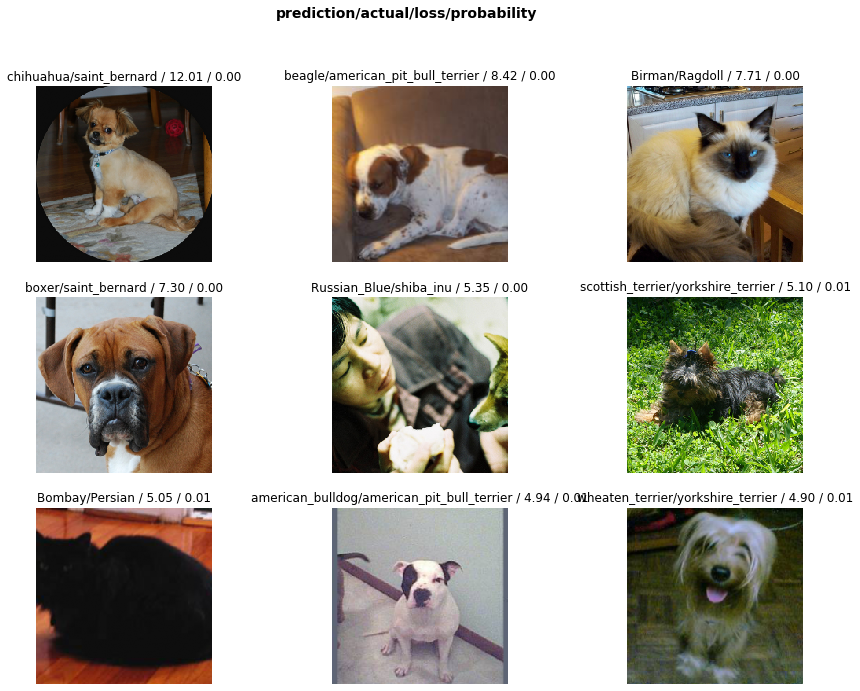

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

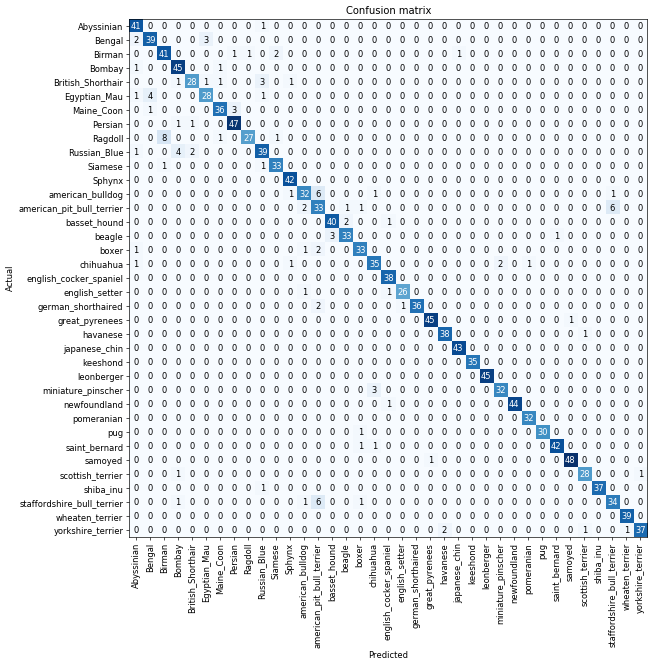

In [40]:
interp.plot_confusion_matrix(figsize=(15,11), dpi=60)

In [42]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('american_bulldog', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Russian_Blue', 'Bombay', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Persian', 3),
 ('beagle', 'basset_hound', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Siamese', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## More Training - Unfreez, Fine-Tuning & Learning Rate

### Unfreeze - to train the WHOLE LAYER

In [43]:
learn.unfreeze() 
#### Unfreeze is used to train the model model (instead of just the final layer of the pretrained model

In [44]:
learn.fit_one_cycle(1) # You can expect the error got much worst. 
#Why? Because it trains the whole layers at the same speed

epoch,train_loss,valid_loss,error_rate,time
0,0.674209,0.369443,0.114344,59:19


In [45]:
#Oh yes now let's load the model that we trained earlier

learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,shiba_inu
Path: /Users/nazribajuri/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,British_Shorthair,British_Shorthair,Sphynx,Bengal
Path: /Users/nazribajuri/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_siz

In [46]:
learn.lr_find()     #this is to find learning rate ('learning rate finder'). 
#The purpose is to find what is the fastest that I can train this NNetwork at
#learning rate = how quickly that it updates its parameter.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


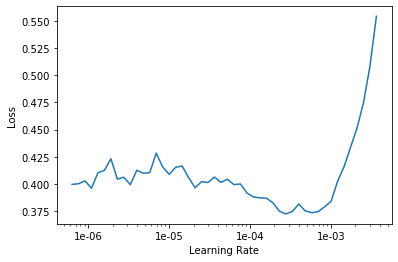

In [47]:
learn.recorder.plot()

In [49]:
#let's learn the whole model, using the learning rate found above

learn.unfreeze ()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))  
# if you noticed the time taken is longer than stage-1 model but with better accuracy

epoch,train_loss,valid_loss,error_rate,time
0,0.348538,0.210372,0.070365,41:17
1,0.309114,0.202877,0.069012,44:07


# Putting your Model into Production
First thing first, let's export the content of our Learner object for production

In [56]:
#This will create a file named 'export.pkl' in the directory where we were working that contains everything 
#we need to deploy our model (the model, the weights but also some metadata like the classes or the 
#transforms/normalization used).

learn.export()  


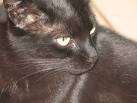

In [54]:
img = open_image(path/'images'/'Bombay_70.jpg')
img

In [58]:
#We create our Learner in production enviromnent like this, jsut make sure that path contains the file 'export.pkl' 
#from before.

learn = load_learner(path/'images')

In [59]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Bombay

# Other Data Format - Different Labelling

### 1. Labelling based on folder

In [60]:
path = untar_data (URLs.MNIST_SAMPLE); 
path

PosixPath('/Users/nazribajuri/.fastai/data/mnist_sample')

In [62]:
URLs.MNIST_SAMPLE

'http://files.fast.ai/data/examples/mnist_sample'

In [63]:
path.ls    #check what are the folder inside the folder path

<bound method <lambda> of PosixPath('/Users/nazribajuri/.fastai/data/mnist_sample')>

In [64]:
(path/'train').ls      #check the content of the folder called 'train'
#some people they have already pre-arranged the data and put them into folder. 

<bound method <lambda> of PosixPath('/Users/nazribajuri/.fastai/data/mnist_sample/train')>

In [65]:
# if you wanna use folder name to put label on your data, you can use this function --> from_folder 
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

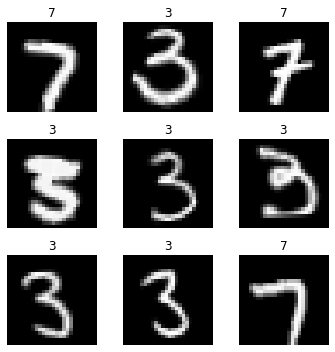

In [68]:
data.show_batch(rows=3, figsize=(5,5))

In [69]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/nazribajuri/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.58MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.201177,0.098128,0.962218,01:11
1,0.112218,0.048265,0.983317,01:09


### 2. Labelling based on .csv file

In [70]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [79]:
# just use 'from_csv' to get the label

data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

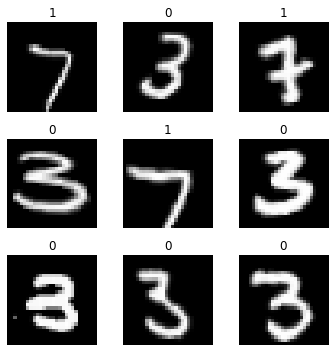

In [80]:
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [73]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

### 3. From regular expression, re (example above)

In [74]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/Users/nazribajuri/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/Users/nazribajuri/.fastai/data/mnist_sample/train/3/21102.png')]

In [75]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

### 4. From a path that is more complex  - use arbitrary function --> from_name_func

In [81]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

### 5. from array of labels --> use 'from_lists'

In [82]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [83]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']